<a href="https://colab.research.google.com/github/VemPrava/FMML_Projects_and_Labs/blob/main/Pravallika_Assignment_FMML_Module4_Lab1_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

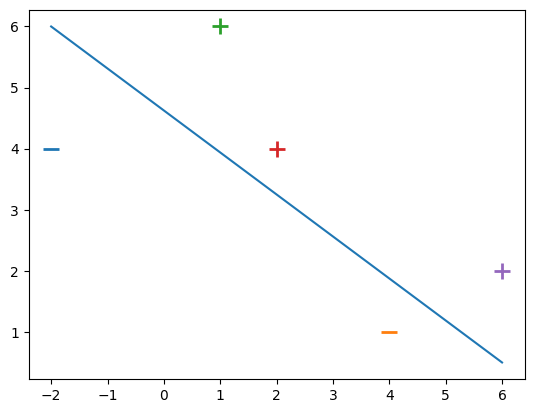

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

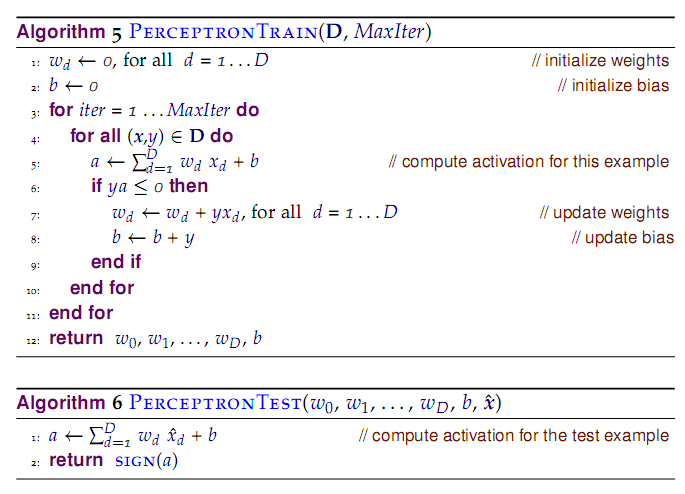

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

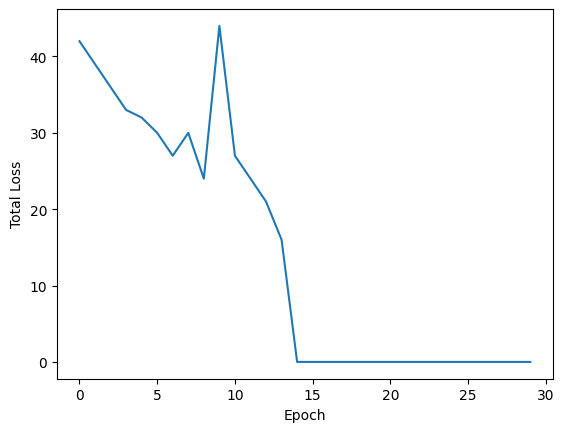

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

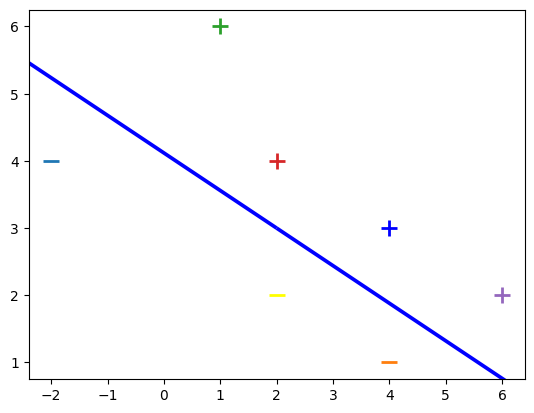

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [24]:
from google.colab import files
uploaded = files.upload()


Saving sonar.all-data.csv to sonar.all-data (1).csv


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Sonar dataset
def load_sonar_data(file_path):
    data = pd.read_csv(file_path, header=None)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    y = np.where(y == 'R', -1, 1)  # 'R' -> -1 (Rock), 'M' -> 1 (Mine)
    return X, y


# Choose your dataset and update the path
dataset = "Sonar"
if dataset == "Sonar":
    X, y = load_sonar_data('sonar.all-data.csv')
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


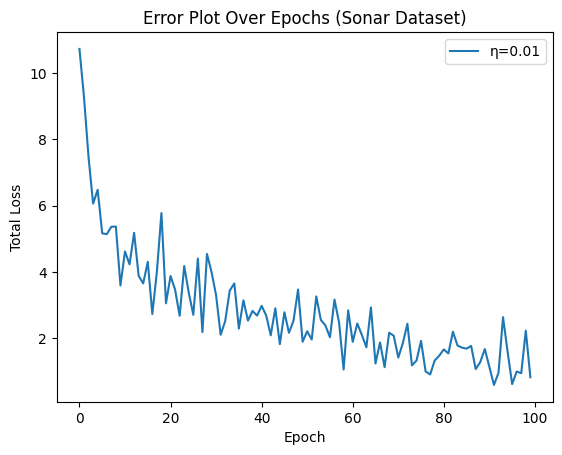

In [29]:
# Perceptron training function with error plotting
def perceptron_algo_plot(X, Y, eta=0.01, epochs=100):
    w = np.zeros(len(X[0]))
    errors = []
    converged_epoch = epochs  # Track the epoch at which the model converges

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

        # Check for convergence
        if total_error == 0:
            converged_epoch = epoch + 1
            break

    # Plot the error
    plt.plot(errors, label=f'η={eta}')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Error Plot Over Epochs ({dataset} Dataset)')
    plt.legend()

    # Explicitly return both values
    return w, converged_epoch

# Train and plot the error
learning_rate = 0.01  # Try different values like 0.001 or 1
epochs = 100
w = perceptron_algo_plot(X_train, y_train, eta=learning_rate, epochs=epochs)


Learning rate: 0.001, Converged in: No convergence epochs
Learning rate: 0.01, Converged in: No convergence epochs
Learning rate: 0.1, Converged in: No convergence epochs
Learning rate: 1, Converged in: No convergence epochs


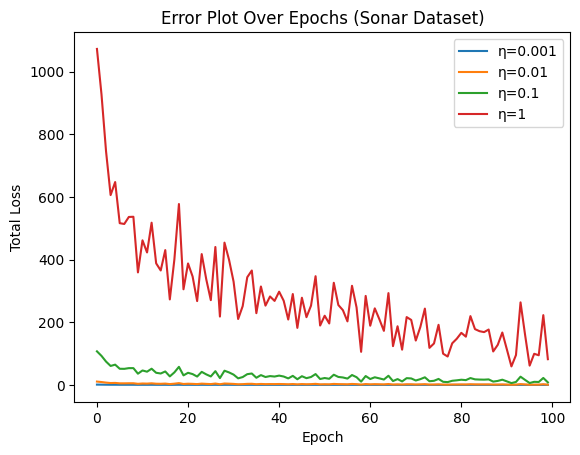

In [30]:
# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1, 1]  # Test a range of learning rates
epochs = 100

# Plot the error for each learning rate
for lr in learning_rates:
    result = perceptron_algo_plot(X_train, y_train, eta=lr, epochs=epochs)

    # Check if result has the expected structure
    if isinstance(result, tuple) and len(result) == 2:
        weights, convergence_epoch = result
        print(f"Learning rate: {lr}, Converged in: {convergence_epoch if convergence_epoch < epochs else 'No convergence'} epochs")
    else:
        print(f"Unexpected result structure for learning rate {lr}: {result}")

# Show the plots
plt.show()

The error plot shows how the total loss changes over 100 epochs for different learning rates (η) when training the perceptron on the Sonar dataset.

**η = 0.001** (blue): The loss remains low but constant, with minimal fluctuation, suggesting that updates are too small. The model makes slow progress and doesn’t converge within 100 epochs.

**η = 0.01** (orange): Loss stays near zero with minor fluctuations. Updates are made, but they’re too small for significant improvement, leading to stable but incomplete convergence.

**η = 0.1** (green): The loss shows slight oscillations near zero. This rate strikes a balance, offering decent updates and lower total loss but still doesn't fully converge within 100 epochs.

**η = 1** (red): The loss fluctuates wildly, failing to stabilize. The high learning rate causes aggressive updates, preventing convergence due to overshooting optimal values.

Low rates offer stability but slow progress, with no full convergence in 100 epochs.
High rates cause instability and divergence, as the model overshoots optimal values.
**Best performance: η = 0.1** offers the best balance, though it still requires more epochs to fully converge.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


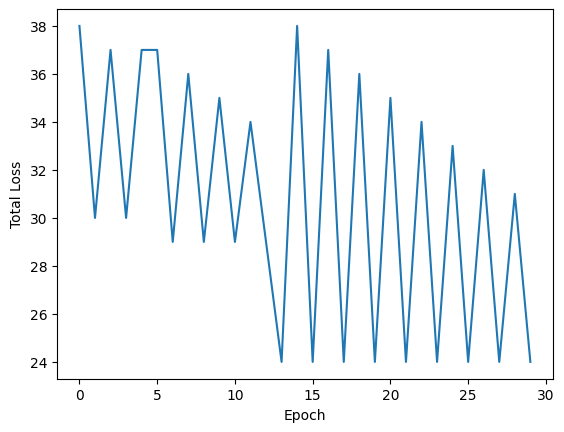

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

(array([ 0.06, -0.01, -0.08]), 100)


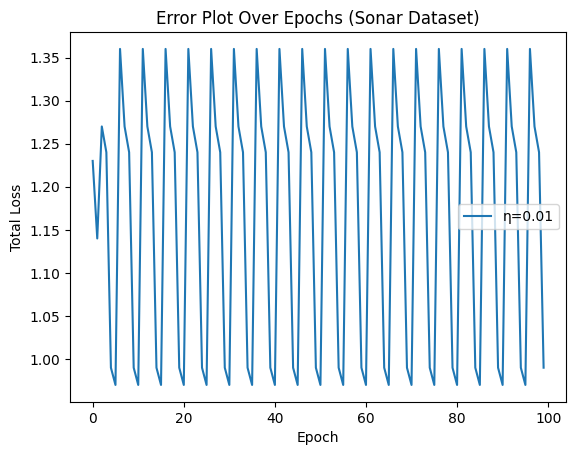

In [31]:
# Non-linearly separable
X = np.array([
    [1, 2, 3],   # Class -1
    [2, 3, 4],   # Class -1
    [3, 4, 5],   # Class 1
    [4, 5, 6],   # Class 1
    [1, 3, 5],   # Class -1
    [5, 6, 7],   # Class -1
    [2, 4, 6],   # Class 1
    [3, 5, 7],   # Class -1
    [4, 3, 2],   # Class 1
])

y = np.array([-1, -1, 1, 1, -1, -1, 1, -1, 1])

# Running the Perceptron algorithm on the 3D dataset
print(perceptron_algo_plot(X, y))

The Perceptron will try to find a hyperplane in 3D space that separates the classes. However, because the data is not linearly separable, it will not converge to a perfect solution.

The loss will fluctuate or plateau in the case of non-linear separability.
The model will not be able to perfectly classify all points, as there is no single hyperplane that can perfectly separate the classes.

Oscillations or plateauing in the loss curve, meaning that the algorithm is adjusting the weights to minimize misclassification but cannot find a perfect solution.
The loss does not drop to zero because the data is not linearly separable.



## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

Final weights: [3. 2.]
Final bias: -4


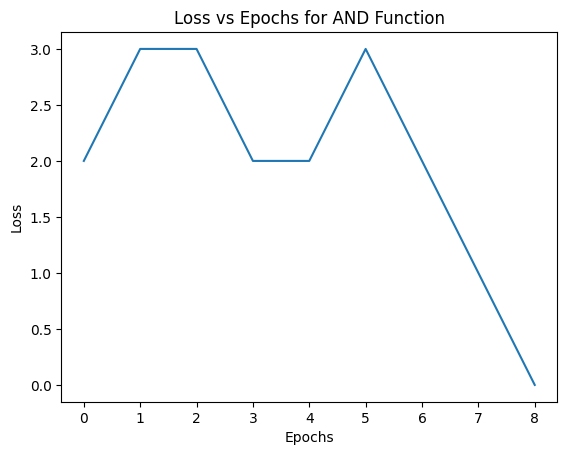

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron Algorithm Function
def perceptron_algo(X, y, eta=1, max_epochs=10):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0
    loss_history = []

    for epoch in range(max_epochs):
        loss = 0
        for i in range(X.shape[0]):
            # Perceptron prediction
            if y[i] * (np.dot(X[i], weights) + bias) <= 0:
                # Update weights and bias if misclassified
                weights += eta * y[i] * X[i]
                bias += eta * y[i]
                loss += 1
        loss_history.append(loss)

        if loss == 0:  # Early stop if no misclassification
            break

    return weights, bias, loss_history

# Define the AND function dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([-1, -1, -1, 1])  # Corresponding labels for AND function

# Train Perceptron on the AND function
weights, bias, loss_history = perceptron_algo(X, y)

# Print the learned weights and bias
print(f"Final weights: {weights}")
print(f"Final bias: {bias}")

# Plot the loss over epochs
plt.plot(loss_history)
plt.title('Loss vs Epochs for AND Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


The loss decreases as the model is trained on more data.
The loss is high and fluctuates at first, suggesting instability in learning, possibly due to a high learning rate or other optimization issues. However, by the final epoch, the loss drops to near zero, indicating the model has successfully learned the AND function.

In [33]:
def generate_truth_table():
    # Generate all possible input combinations for 2-bit binary inputs
    inputs = np.array([[x, y] for x in range(2) for y in range(2)])

    # Generate all possible 16 boolean functions (truth tables)
    boolean_functions = []
    for i in range(16):
        # Convert the integer to a binary list representing the truth table
        function_output = np.array([int(x) for x in format(i, '04b')])
        boolean_functions.append((inputs, function_output))

    return boolean_functions

# Check if a function is linearly separable
def check_linearly_separable(X, y):
    _, _, loss_history = perceptron_algo(X, y)
    return loss_history[-1] == 0  # If no loss in the final epoch, it is separable

# Generate and test all 16 Boolean functions
boolean_functions = generate_truth_table()
learnable_functions = []
non_learnable_functions = []

for X, y in boolean_functions:
    y = 2 * y - 1  # Convert 0/1 labels to -1/+1 for Perceptron
    if check_linearly_separable(X, y):
        learnable_functions.append((X, y))
    else:
        non_learnable_functions.append((X, y))

# Print learnable and non-learnable functions
print(f"Learnable Functions: {len(learnable_functions)}")
for X, y in learnable_functions:
    print(f"X: {X}, y: {y}")

print(f"\nNon-Learnable Functions: {len(non_learnable_functions)}")
for X, y in non_learnable_functions:
    print(f"X: {X}, y: {y}")


Learnable Functions: 14
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [-1 -1 -1 -1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [-1 -1 -1  1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [-1 -1  1 -1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [-1 -1  1  1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [-1  1 -1 -1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [-1  1 -1  1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [-1  1  1  1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [ 1 -1 -1 -1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [ 1 -1  1 -1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [ 1 -1  1  1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [ 1  1 -1 -1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [ 1  1 -1  1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [ 1  1  1 -1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [1 1 1 1]

Non-Learnable Functions: 2
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [-1  1  1 -1]
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [ 1 -1 -1  1]


**Learnable Functions** (14 out of 16):
The Perceptron can learn 14 of the 16 possible Boolean functions for 2-bit inputs. These include basic logical operations such as:

Constant functions (Always 1 or 0)
AND, OR, NAND, NOR
Other linearly separable functions that can be split by a single hyperplane.
These functions have clear boundaries that the Perceptron can separate.

**Non-Learnable Functions** (2 out of 16):
Two Boolean functions are not learnable:

XOR: The output cannot be separated by a single hyperplane, as the points (0,1) and (1,0) cannot be differentiated from (0,0) and (1,1) using a straight line.
Equivalence: Similar to XOR, this function cannot be separated linearly.

.


Linearly separable functions (like AND, OR) can be learned by the Perceptron.
Non-linearly separable functions (like XOR) require more complex models, such as multi-layer neural networks, as the Perceptron cannot handle non-linear boundaries.
The Perceptron is limited to problems that are linearly separable.